# Inference Sampling
- The notebook visualizes the Recall and MRR metrics at each cutoff for different negative sampling sizes (or even techniques)
- This helps us to better understand how different negative sample sizes affect model performance:
    - Recall and MRR scores
    - Relative model ranking

In [1]:
# Before running this notebook make sure to execute the following commands, to create the necessary datasets:
# ! python data/coveo_preproc.py -p data/data_sources/coveo_ecommerce
# ! python data/retailrocket_preproc.py -p data/data_sources/retailrocket_ecommerce
# ! python data/rees46_preproc.py -p data/data_sources/ress46_ecommerce

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import itertools

from utils.experiment_setup import gru4rec_sampling_setups as setups
from utils.gru4rec_train_test_utils import train_test_gru4rec_models 
from utils.plot_config import *
mpl.rc('lines', linewidth=plot_line_width)

In [3]:
ranks_path = "data/results/sampling_results"
experiments = {
    "coveo": {
        "train_path": "data/data_sources/coveo_ecommerce/coveo_processed_view_train_full.tsv",
        "test_path": "data/data_sources/coveo_ecommerce/coveo_processed_view_test.tsv",
        "methods": ["full", "0.1", "100", "0.001"]
    },
    "retailrocket": {
        "train_path": "data/data_sources/retailrocket_ecommerce/retailrocket_processed_view_train_full.tsv",
        "test_path": "data/data_sources/retailrocket_ecommerce/retailrocket_processed_view_test.tsv",
        "methods": ["full", "0.1", "0.01", "100", "0.001"]
    },
    "rees46": {
        "train_path": "data/data_sources/rees46_ecommerce/rees46_processed_view_train_full.tsv",
        "test_path": "data/data_sources/rees46_ecommerce/rees46_processed_view_test.tsv",
        "methods": ["full", "0.1", "0.01", "100"]
    },
}
n_epochs = 5

### Training the models required for this experiment

In [4]:
exp = {}
for dataset_name, dataset_params in experiments.items():
    exp[dataset_name] = {"train_path": dataset_params["train_path"]}
train_test_gru4rec_models(experiments=exp, setups=setups, n_epochs=n_epochs, save_model=True)

SKIPPING training, model already exists: data/models/coveo_optuna_mrr_bprmax_constrained_fulltrain.pickle
SKIPPING training, model already exists: data/models/coveo_optuna_mrr_xe_noembed_fulltrain.pickle
SKIPPING training, model already exists: data/models/retailrocket_localsearch100_bprmax_constrained_fulltrain.pickle
SKIPPING training, model already exists: data/models/retailrocket_optuna_recall_xe_embed_fulltrain.pickle
SKIPPING training, model already exists: data/models/rees46_optuna_mrr_xe_noembed_fulltrain.pickle
SKIPPING training, model already exists: data/models/rees46_localsearch100_bprmax_embed_fulltrain.pickle
SKIPPING training, model already exists: data/models/rees46_localsearchbig_bprmax_constrained_fulltrain.pickle


### Using the trained models to measure Recall and MRR values for different negative sample sizes

In [5]:
for dataset_key, dataset_params in experiments.items():
    train_path =  dataset_params["train_path"]
    test_path =  dataset_params["test_path"]
    methods = dataset_params["methods"]
    for model_key, params in setups[dataset_key].items():
        model_path = os.path.join("data", "models", model_key+".pickle")
        ret_code = os.system(f"conda run -n gru4rec_theano_gpu --no-capture-output THEANO_FLAGS='device=cuda0,dnn.enabled=False' python sampling/inference_sampling.py --train_path {train_path} --test_path {test_path} --model_path {model_path} --methods {' '.join(methods)}")
        if ret_code != 0: raise ValueError(f"process returned with code: {ret_code}") 

Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda0: NVIDIA GeForce GTX TITAN X (0000:02:00.0)


Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_full_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_full_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_0.1_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_0.1_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_100_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_100_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_0.001_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_bprmax_constrained_fulltrain_0.001_mrr.tsv


Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda0: NVIDIA GeForce GTX TITAN X (0000:02:00.0)


Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_xe_noembed_fulltrain_full_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_xe_noembed_fulltrain_full_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_xe_noembed_fulltrain_0.1_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_xe_noembed_fulltrain_0.1_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_xe_noembed_fulltrain_100_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_xe_noembed_fulltrain_100_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/coveo_optuna_mrr_xe_noembed_fulltrain_0.001_recall.tsv
data/results/sampling_results/coveo_optuna_mrr_xe_noembed_fulltrain_0.001_mrr.tsv


Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda0: NVIDIA GeForce GTX TITAN X (0000:02:00.0)


Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_localsearch100_bprmax_constrained_fulltrain_full_recall.tsv
data/results/sampling_results/retailrocket_localsearch100_bprmax_constrained_fulltrain_full_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_localsearch100_bprmax_constrained_fulltrain_0.1_recall.tsv
data/results/sampling_results/retailrocket_localsearch100_bprmax_constrained_fulltrain_0.1_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_localsearch100_bprmax_constrained_fulltrain_0.01_recall.tsv
data/results/sampling_results/retailrocket_localsearch100_bprmax_constrained_fulltrain_0.01_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_localsearch100_bprmax_constrained_fulltrain_100_recall.tsv
data/results/sampling_results/retailrocket_localsearch100_bprmax_constrained_fulltrain_100_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailr

Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda0: NVIDIA GeForce GTX TITAN X (0000:02:00.0)


Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_optuna_recall_xe_embed_fulltrain_full_recall.tsv
data/results/sampling_results/retailrocket_optuna_recall_xe_embed_fulltrain_full_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_optuna_recall_xe_embed_fulltrain_0.1_recall.tsv
data/results/sampling_results/retailrocket_optuna_recall_xe_embed_fulltrain_0.1_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_optuna_recall_xe_embed_fulltrain_0.01_recall.tsv
data/results/sampling_results/retailrocket_optuna_recall_xe_embed_fulltrain_0.01_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_optuna_recall_xe_embed_fulltrain_100_recall.tsv
data/results/sampling_results/retailrocket_optuna_recall_xe_embed_fulltrain_100_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/retailrocket_optuna_recall_xe_embed_fulltrain_0.001_recall.tsv
data/results/sampling_results/re

Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda0: NVIDIA GeForce GTX TITAN X (0000:02:00.0)


Files already exist, SKIPPING:
data/results/sampling_results/rees46_optuna_mrr_xe_noembed_fulltrain_full_recall.tsv
data/results/sampling_results/rees46_optuna_mrr_xe_noembed_fulltrain_full_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/rees46_optuna_mrr_xe_noembed_fulltrain_0.1_recall.tsv
data/results/sampling_results/rees46_optuna_mrr_xe_noembed_fulltrain_0.1_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/rees46_optuna_mrr_xe_noembed_fulltrain_0.01_recall.tsv
data/results/sampling_results/rees46_optuna_mrr_xe_noembed_fulltrain_0.01_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/rees46_optuna_mrr_xe_noembed_fulltrain_100_recall.tsv
data/results/sampling_results/rees46_optuna_mrr_xe_noembed_fulltrain_100_mrr.tsv


Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda0: NVIDIA GeForce GTX TITAN X (0000:02:00.0)


Files already exist, SKIPPING:
data/results/sampling_results/rees46_localsearch100_bprmax_embed_fulltrain_full_recall.tsv
data/results/sampling_results/rees46_localsearch100_bprmax_embed_fulltrain_full_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/rees46_localsearch100_bprmax_embed_fulltrain_0.1_recall.tsv
data/results/sampling_results/rees46_localsearch100_bprmax_embed_fulltrain_0.1_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/rees46_localsearch100_bprmax_embed_fulltrain_0.01_recall.tsv
data/results/sampling_results/rees46_localsearch100_bprmax_embed_fulltrain_0.01_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/rees46_localsearch100_bprmax_embed_fulltrain_100_recall.tsv
data/results/sampling_results/rees46_localsearch100_bprmax_embed_fulltrain_100_mrr.tsv


Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda0: NVIDIA GeForce GTX TITAN X (0000:02:00.0)


Files already exist, SKIPPING:
data/results/sampling_results/rees46_localsearchbig_bprmax_constrained_fulltrain_full_recall.tsv
data/results/sampling_results/rees46_localsearchbig_bprmax_constrained_fulltrain_full_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/rees46_localsearchbig_bprmax_constrained_fulltrain_0.1_recall.tsv
data/results/sampling_results/rees46_localsearchbig_bprmax_constrained_fulltrain_0.1_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/rees46_localsearchbig_bprmax_constrained_fulltrain_0.01_recall.tsv
data/results/sampling_results/rees46_localsearchbig_bprmax_constrained_fulltrain_0.01_mrr.tsv
Files already exist, SKIPPING:
data/results/sampling_results/rees46_localsearchbig_bprmax_constrained_fulltrain_100_recall.tsv
data/results/sampling_results/rees46_localsearchbig_bprmax_constrained_fulltrain_100_mrr.tsv


In [6]:
def load_data(file_name):
    data = pd.read_csv(file_name, sep='\t', header=None)
    data = data.values.flatten()
    return data

def format_plot(ax, handles, legend_loc="best"):
    ax.legend(handles=handles, loc=legend_loc, prop={'size': fontsize*0.8})
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(plot_axis_line_width)
    ax.tick_params(width=plot_axis_line_width)
    ax.tick_params(axis='both', which='major', labelsize=fontsize*0.8)
    ax.tick_params(axis='both', which='minor', labelsize=fontsize*0.8)
    ax.xaxis.grid()

# intersection between line(p1, p2) and line(p3, p4)
def intersect(p1, p2, p3, p4):
    x1,y1 = p1[:,0], p1[:,1]
    x2,y2 = p2[:,0], p2[:,1]
    x3,y3 = p3[:,0], p3[:,1]
    x4,y4 = p4[:,0], p4[:,1]
    denom = (y4-y3)*(x2-x1) - (x4-x3)*(y2-y1)
    ua = ((x4-x3)*(y1-y3) - (y4-y3)*(x1-x3)) / denom
    ub = ((x2-x1)*(y1-y3) - (y2-y1)*(x1-x3)) / denom
    xs = x1 + ua * (x2-x1)
    ys = y1 + ua * (y2-y1)
    return xs, ys

In [7]:
def create_plot(ranks_path, models, methods, metric="recall", show_intersection=True, legend_loc="best", colors=colors):
    fig, ax_main = plt.subplots(figsize=(15,10))
    plot_handles = []
    intersec_handles = []
    for i, method in enumerate(methods):
        metric_values_for_method = []
        for j, (model_name_key, model_name_val) in enumerate(models.items()):
            metric_values = load_data(os.path.join(ranks_path, f"{model_name_val}_{method}_{metric}.tsv"))
            metric_values_for_method.append(metric_values)
            color = colors[f"color_{j%3}"]
            linestyle = linestyles[i%len(linestyles)]
            plot_handle, = ax_main.plot(np.arange(len(metric_values))+1, metric_values, label=f"{model_name_key} ({method})", linestyle=linestyle, c=color)
            plot_handles.append(plot_handle)
        if show_intersection:
            for val1, val2 in itertools.permutations(metric_values_for_method, 2):
                signs = np.sign(val1-val2)
                signs_mask = np.diff(signs).astype(bool)
                idx_intersect = np.argwhere(signs_mask).flatten()
                if len(idx_intersect) > 0:
                    xs = np.arange(len(val1))+1
                    p1s = np.hstack((xs[idx_intersect].reshape(-1,1), val1[idx_intersect].reshape(-1,1)))
                    p2s = np.hstack((xs[idx_intersect+1].reshape(-1,1), val1[idx_intersect+1].reshape(-1,1)))
                    p3s = np.hstack((xs[idx_intersect].reshape(-1,1), val2[idx_intersect].reshape(-1,1)))
                    p4s = np.hstack((xs[idx_intersect+1].reshape(-1,1), val2[idx_intersect+1].reshape(-1,1)))
                    x_int, y_int = intersect(p1s,p2s,p3s,p4s)
                    intersec_handle, = ax_main.plot(x_int, y_int, 'ro', markersize=12, label="intersection", markeredgecolor="black") #ro
                    intersec_handles.append(intersec_handle)

    if len(intersec_handles) > 0:
        plot_handles.append(intersec_handles[-1])
    format_plot(ax=ax_main, handles=plot_handles, legend_loc=legend_loc)
    ax_main.set_xlabel("N", fontsize=fontsize)
    ax_main.set_ylabel(metric, fontsize=fontsize)
    ax_main.set_xscale('log')
    plt.show()
        

# Results

## Coveo

In [8]:
methods = experiments["coveo"]["methods"]
model_a = "coveo_optuna_mrr_bprmax_constrained_fulltrain"
model_b = "coveo_optuna_mrr_xe_noembed_fulltrain"
models = {"Model A": model_a, "Model B": model_b}

### Plot for Coveo Recall values
- When no sampling is applied, *Model A* performs better than *Model B* in terms of Recall@[1,5,10,20]
- As the sample sizes get smaller, the intersection of the recall plots move towards the left end of the lines, indicating that the performance reversal can be observerd at lower and lower cutoff values. 
- If we take sampling to the extremes, a full reversal can also be achieved
- When 100 negative samples are used, *Model B* already perfomes better than *Model A* when Recall@[5,10,20] is considered


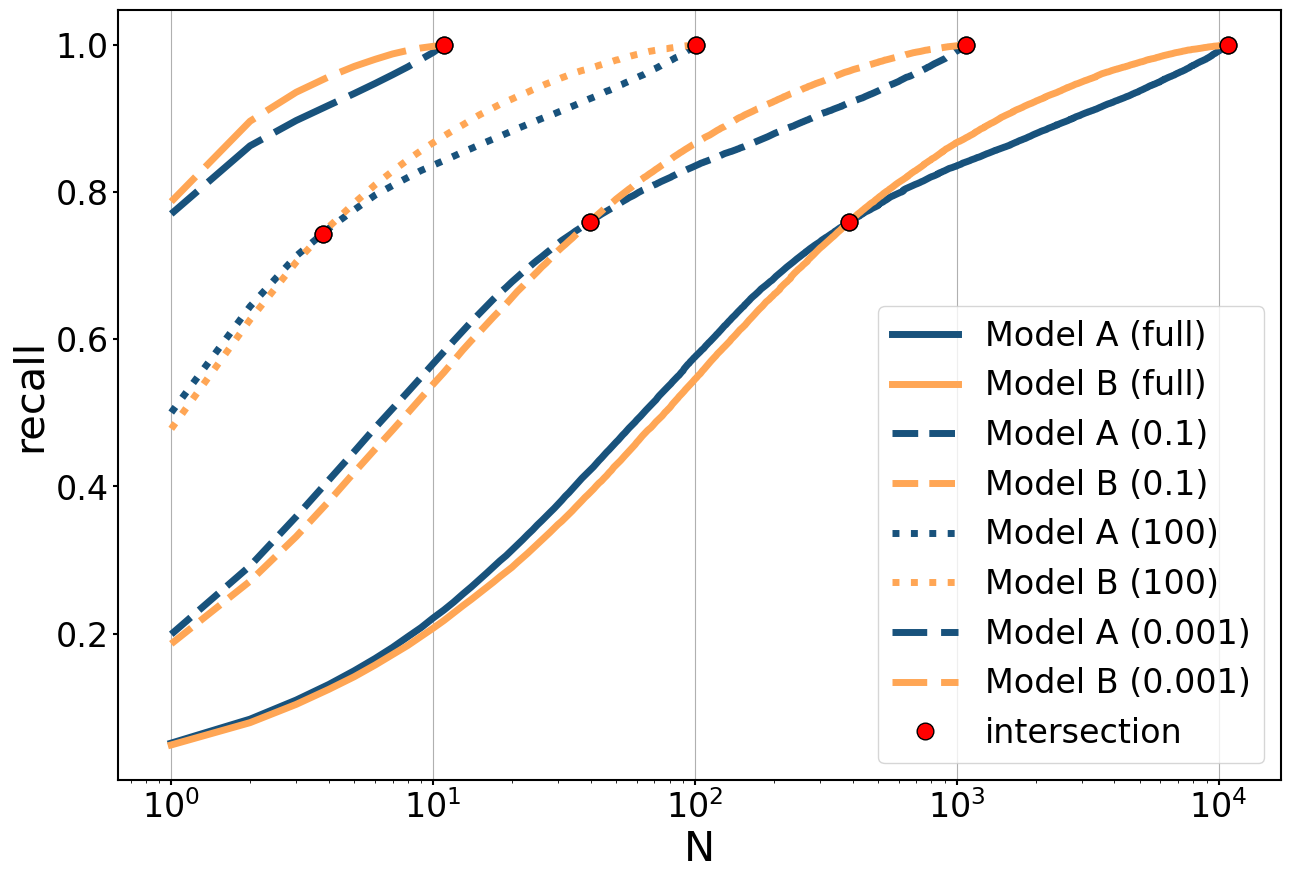

In [9]:
create_plot(ranks_path=ranks_path, models=models, methods=methods, metric="recall", show_intersection=True)

### Plot for Coveo MRR values
- When no sampling is used, *Model A* has better MRR scores than *Model B*
- MRR is a top heavy metric:
    - A very large portion of the MRR value will be determined at small cutoff values.
    - It can be seen from the Recall plot, that *Model A* outperforms *Modell B* for small cutoff values across the board, except for 0.001 negative samples
- In this case we can not observe any intersection, instead, we can observe an immediate full model performance reversal at 100 negative and 0.001 negative samples (at least for these specific negative sampling sizes).   

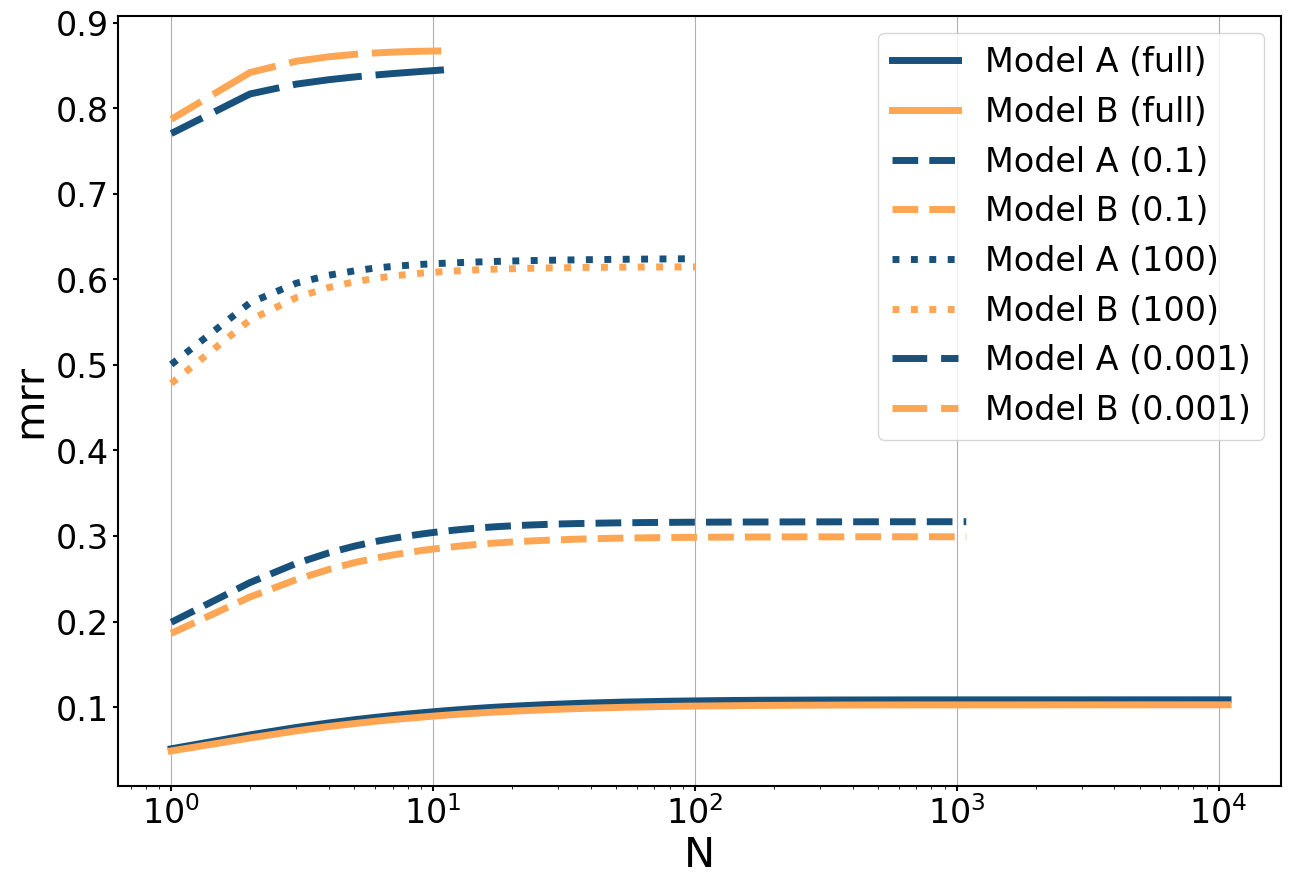

In [10]:
create_plot(ranks_path=ranks_path, models=models, methods=methods, metric="mrr", show_intersection=True)

## Retail rocket

In [11]:
methods = experiments["retailrocket"]["methods"]
model_a = "retailrocket_optuna_recall_xe_embed_fulltrain"
model_b = "retailrocket_localsearch100_bprmax_constrained_fulltrain"
models = {"Model A": model_a, "Model B": model_b}

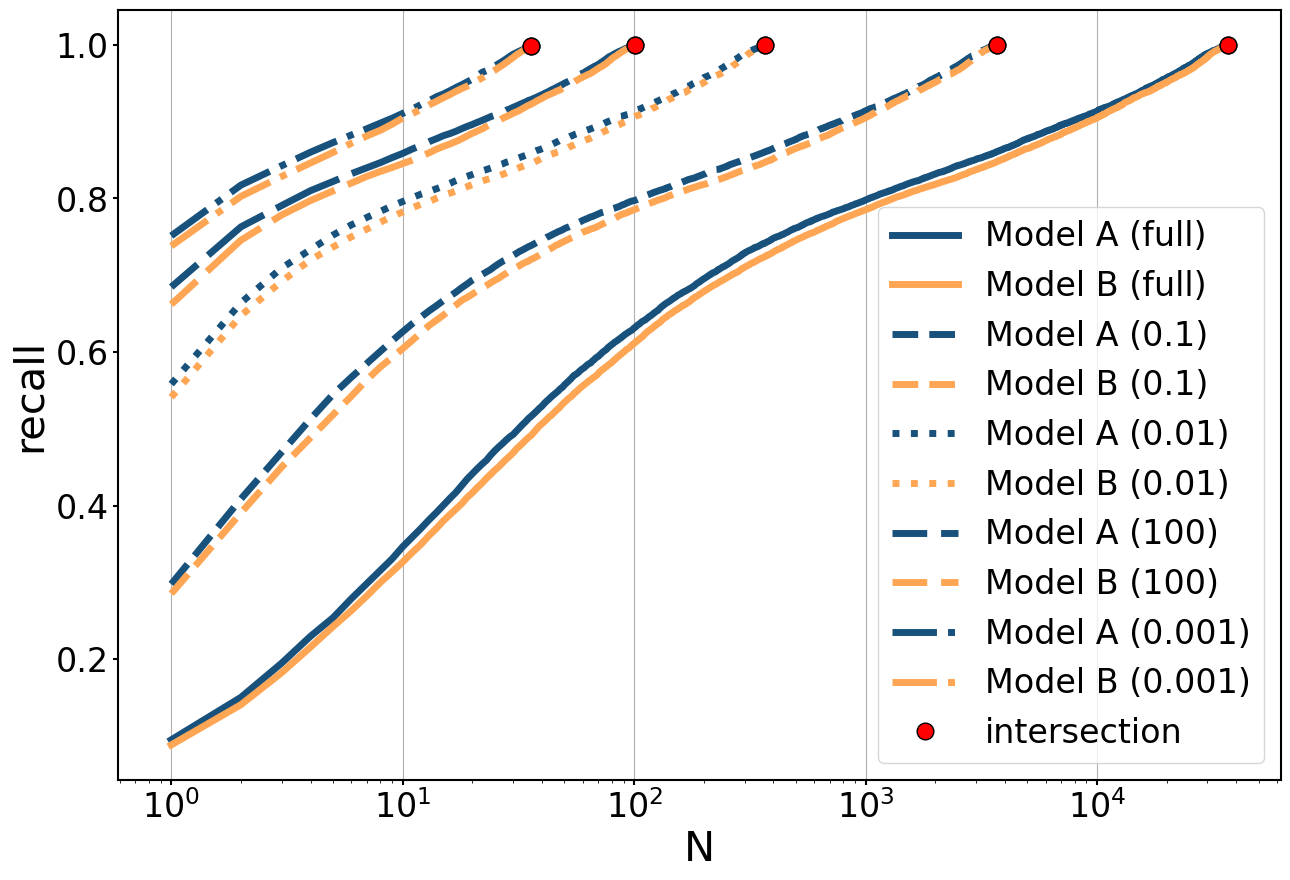

In [12]:
create_plot(ranks_path=ranks_path, models=models, methods=methods, metric="recall", show_intersection=True, legend_loc=4)

## Rees46

In [13]:
methods = experiments["rees46"]["methods"]
model_a = "rees46_optuna_mrr_xe_noembed_fulltrain"
model_b = "rees46_localsearch100_bprmax_embed_fulltrain"
model_c = "rees46_localsearchbig_bprmax_constrained_fulltrain"
models = {"Model A": model_a, "Model B": model_b}

### Plot for Rees46 Recall (Model A and B)
- This plot shows and interesting phenomenon. When no sampling is applied, Model A outperfoms Model B at cutoffs smaller than ~55. From ~55 to ~8000 Model B comes out on top. At the end of the recall curve Model A takes the lead again.

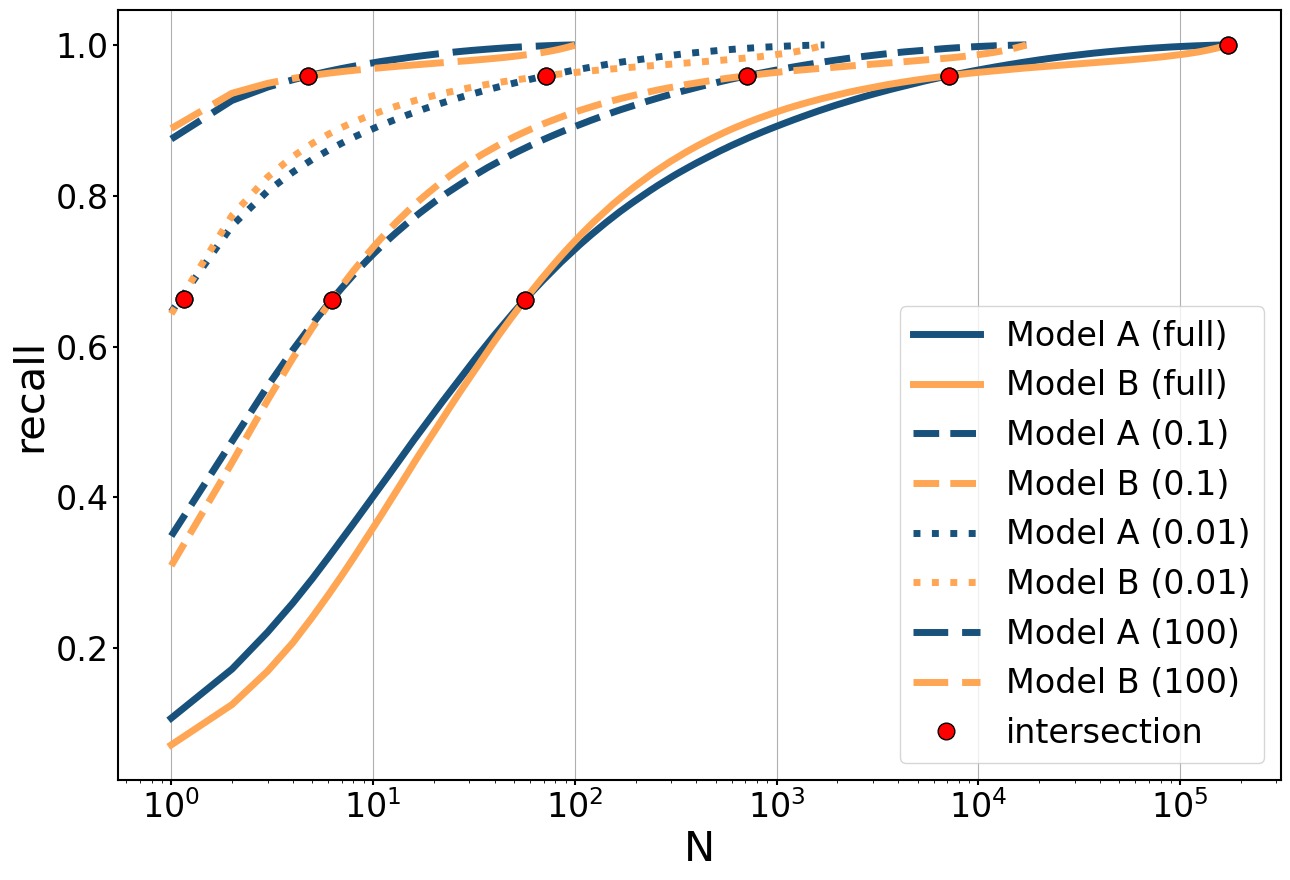

In [14]:
create_plot(ranks_path=ranks_path, models=models, methods=methods, metric="recall", show_intersection=True, legend_loc=4)

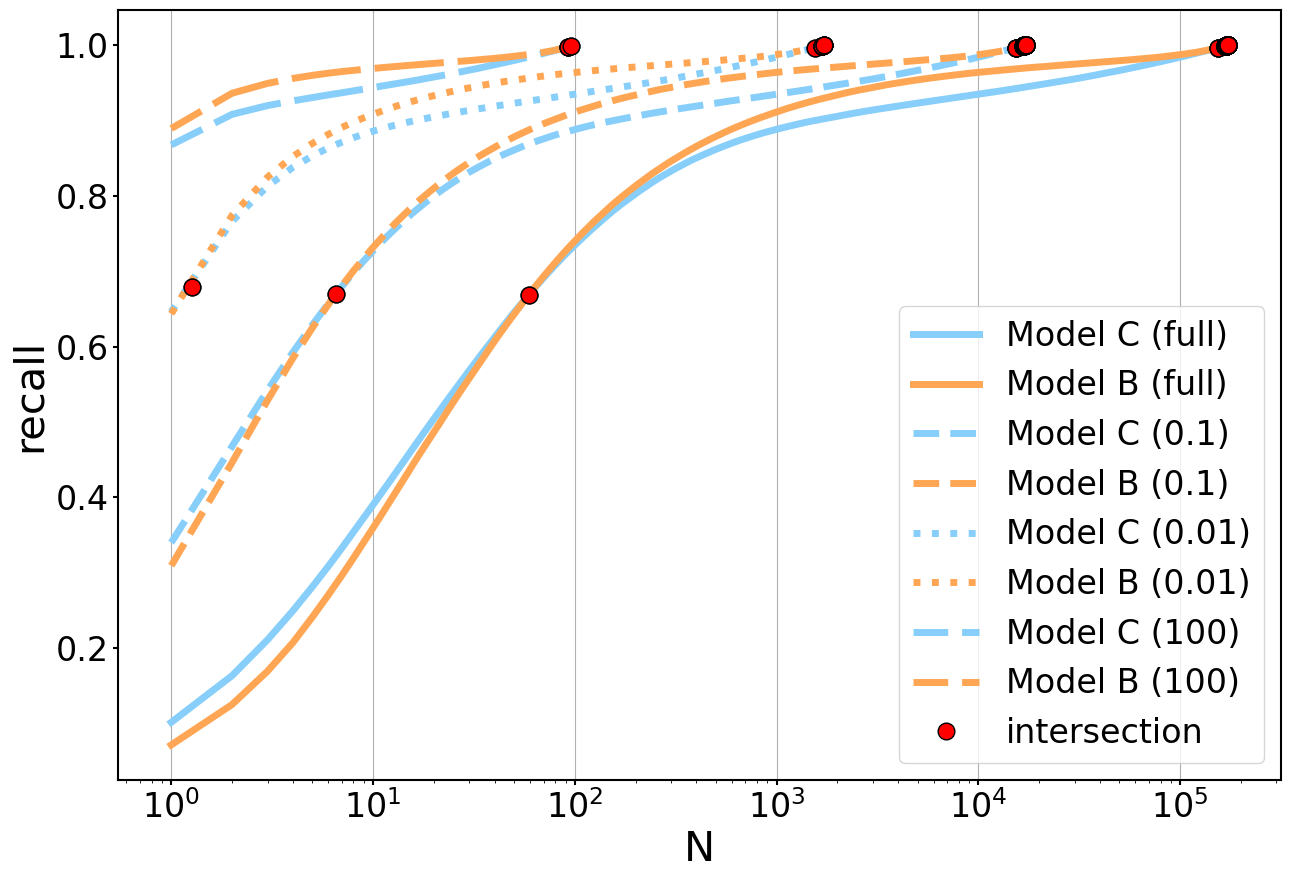

In [15]:
models = {"Model C": model_c, "Model B": model_b}
create_plot(ranks_path=ranks_path, models=models, methods=methods, metric="recall", show_intersection=True, legend_loc=4, colors={"color_0":colors["color_2"], "color_1":colors["color_1"]})

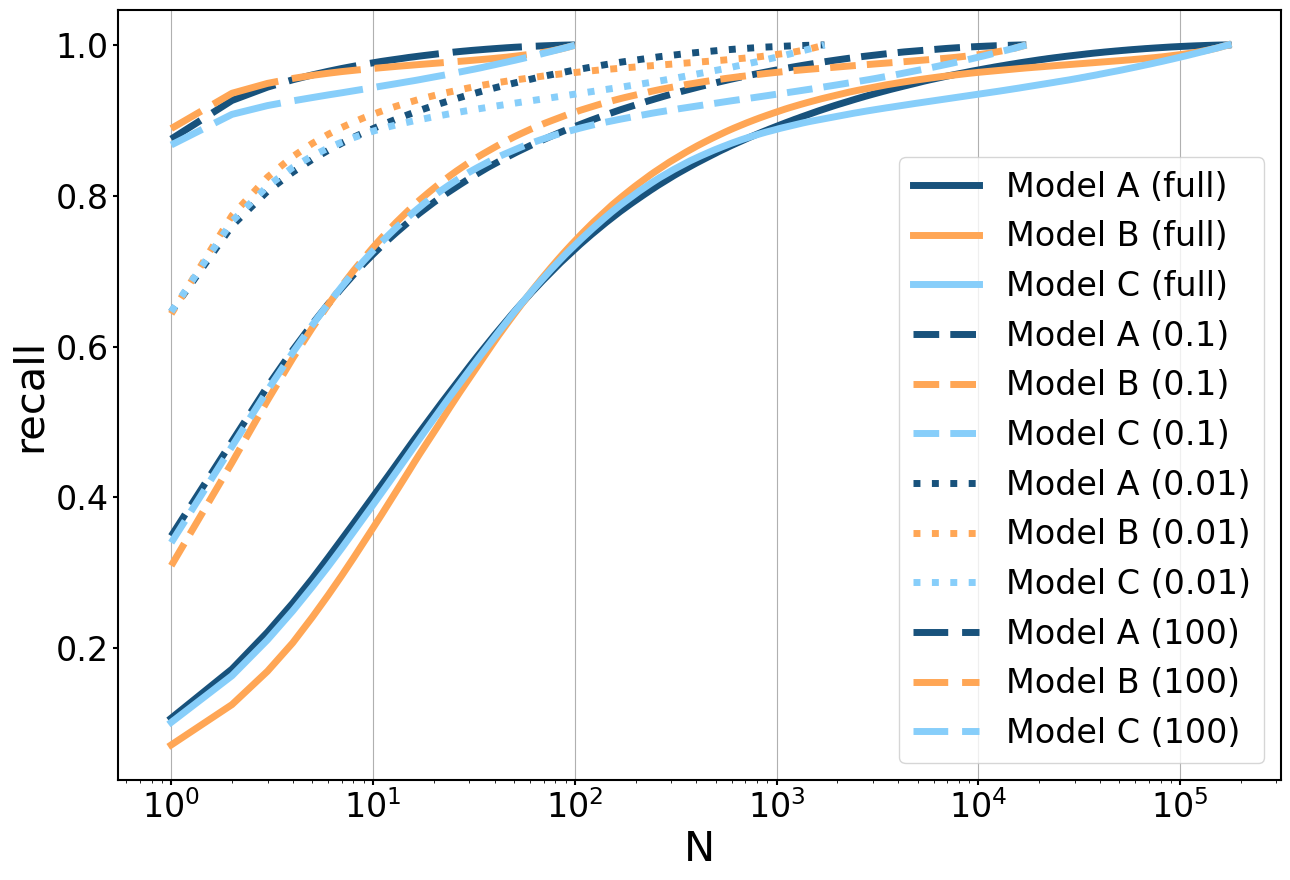

In [16]:
models = {"Model A": model_a, "Model B": model_b, "Model C": model_c}
create_plot(ranks_path=ranks_path, models=models, methods=methods, metric="recall", show_intersection=False, legend_loc=4)

### Plot for Rees46 MRR values
- The relative performance of Model A and C stays the same. When sufficently small negative sampling is applied, the worst performer (considering MRR) Model B can outperform Model A and Model C.

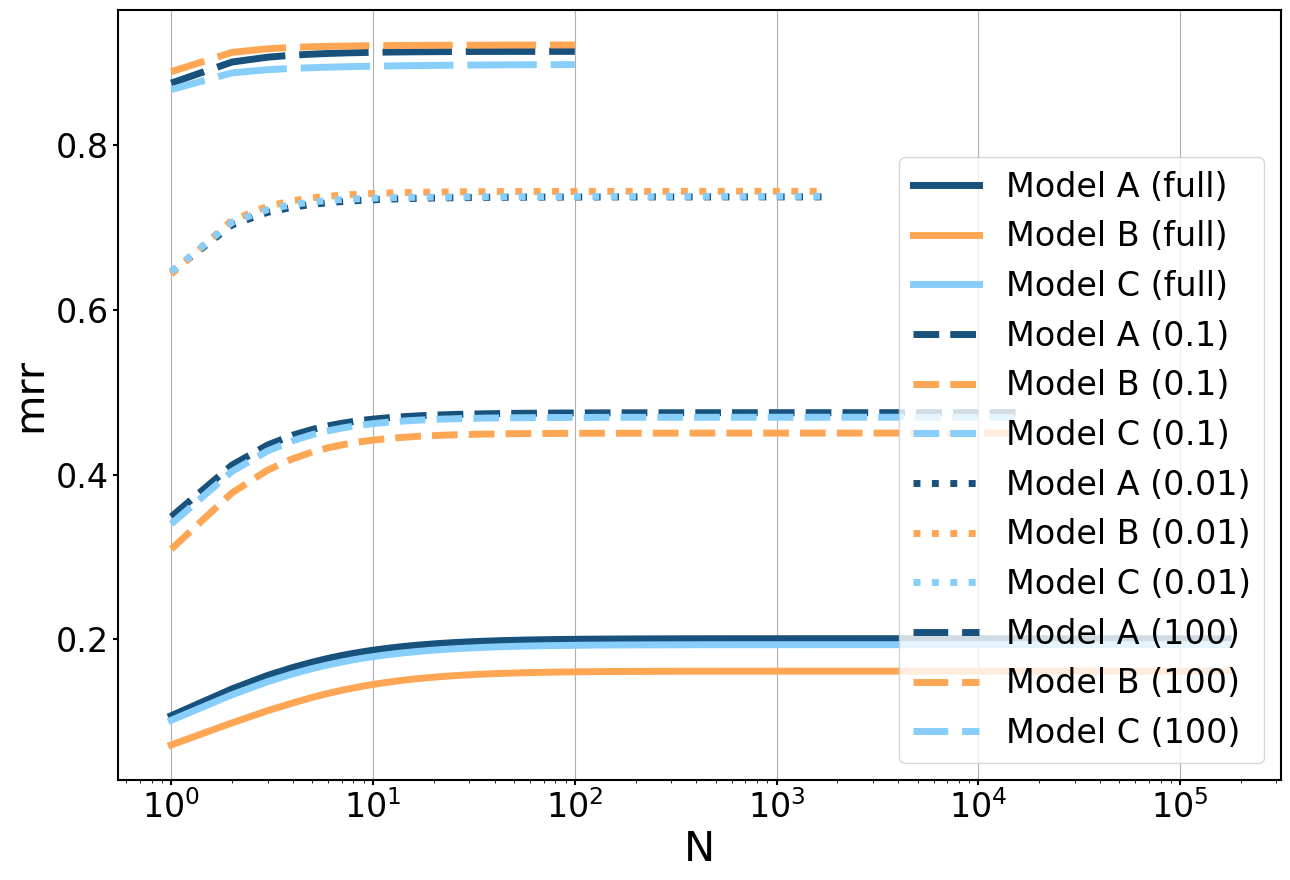

In [17]:
create_plot(ranks_path=ranks_path, models=models, methods=methods, metric="mrr", show_intersection=False, legend_loc=4)